# Part 1: EDA

Performing Exploratory Data Analysis to perform initial investigations on data so as to discover patterns,to spot anomalies and test hypothesis with the help of summary statistics and graphical representations.

In [175]:
# Run the common codes to import modules, get data and pre-defined loss functions
%run Part0.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               1061 non-null   object  
 1   selling_price      1061 non-null   int64   
 2   year               1061 non-null   int64   
 3   seller_type        1061 non-null   category
 4   owner              1061 non-null   int64   
 5   km_driven          1061 non-null   int64   
 6   ex_showroom_price  626 non-null    float64 
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 51.0+ KB
None
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual 

In [176]:
# importing the necessary libraries for EDA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The visulisation used in this python notebook to conduct EDA are : 
- Matplotlib - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

## Data Summary

In [177]:
# looking at the first few rows of the dataset
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1,350,NaN
1,Honda Dio,45000,2017,Individual,1,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2,21000,NaN


In [178]:
# shape of the dataset
df.shape

(1061, 7)

There are 1061 rows and 7 columns

In [179]:
# data types of each column
df.dtypes

name                   object
selling_price           int64
year                    int64
seller_type          category
owner                   int64
km_driven               int64
ex_showroom_price     float64
dtype: object

We see that Selling Price, Year, Kilometers driven and Ex Showroom Price are the true numerical columns. Owner ideally should be a categorical column so we will go ahead and convert Owner to categorical datatype.

In [180]:
# checking for null values
df.isna().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Not every bike model ahs an Ex Showroom price attached.

In [183]:
# converting owner to category
df['owner'] = df['owner'].astype("category")

In [184]:
# Numerical summaries 
df.groupby(['seller_type'])['selling_price'].mean()

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64

Individual Seller have a greater mean selling price than Dealers.

In [185]:
# Numerical summaries 
grouped = df.groupby(['name'])['selling_price'].mean()
grouped.sort_values(ascending = False)

name
Suzuki GSX S750                   760000.0
Harley-Davidson Street Bob        750000.0
Yamaha YZF R3                     365000.0
Kawasaki Ninja 650 [2018-2019]    362500.0
Harley-Davidson Street 750        330000.0
                                    ...   
Hero Honda Street Smart            10000.0
TVS Centra                         10000.0
Hero Honda CD100SS                 10000.0
Hero Honda Passion                  9000.0
TVS Excel                           5000.0
Name: selling_price, Length: 279, dtype: float64

The top 3 bikes with the highest mean selling price are : 
- Suzuki GSX S750
- Harley-Davidson Street Bob
- Yamaha YZF R3

In [186]:
# checking for unique values in each column
df.nunique()

name                 279
selling_price        130
year                  28
seller_type            2
owner                  4
km_driven            304
ex_showroom_price    230
dtype: int64

In [187]:
# Exploring the various columns
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [188]:
# Data distribution across the categorical columns
df['seller_type'].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

We see that the distribution of Sellers is not balanced. We have many more individual sellers than dealers.

In [189]:
print(df['owner'].value_counts())

1    924
2    123
3     11
4      3
Name: owner, dtype: int64


Owner 1 has the maximum bikes. 

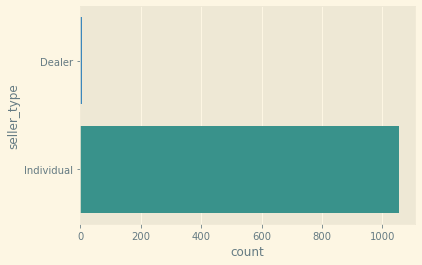

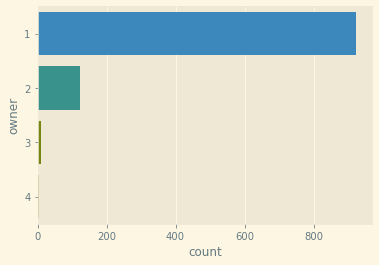

In [190]:
#displaying data distribution across categorical variables 
for col in df.select_dtypes(include='category'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

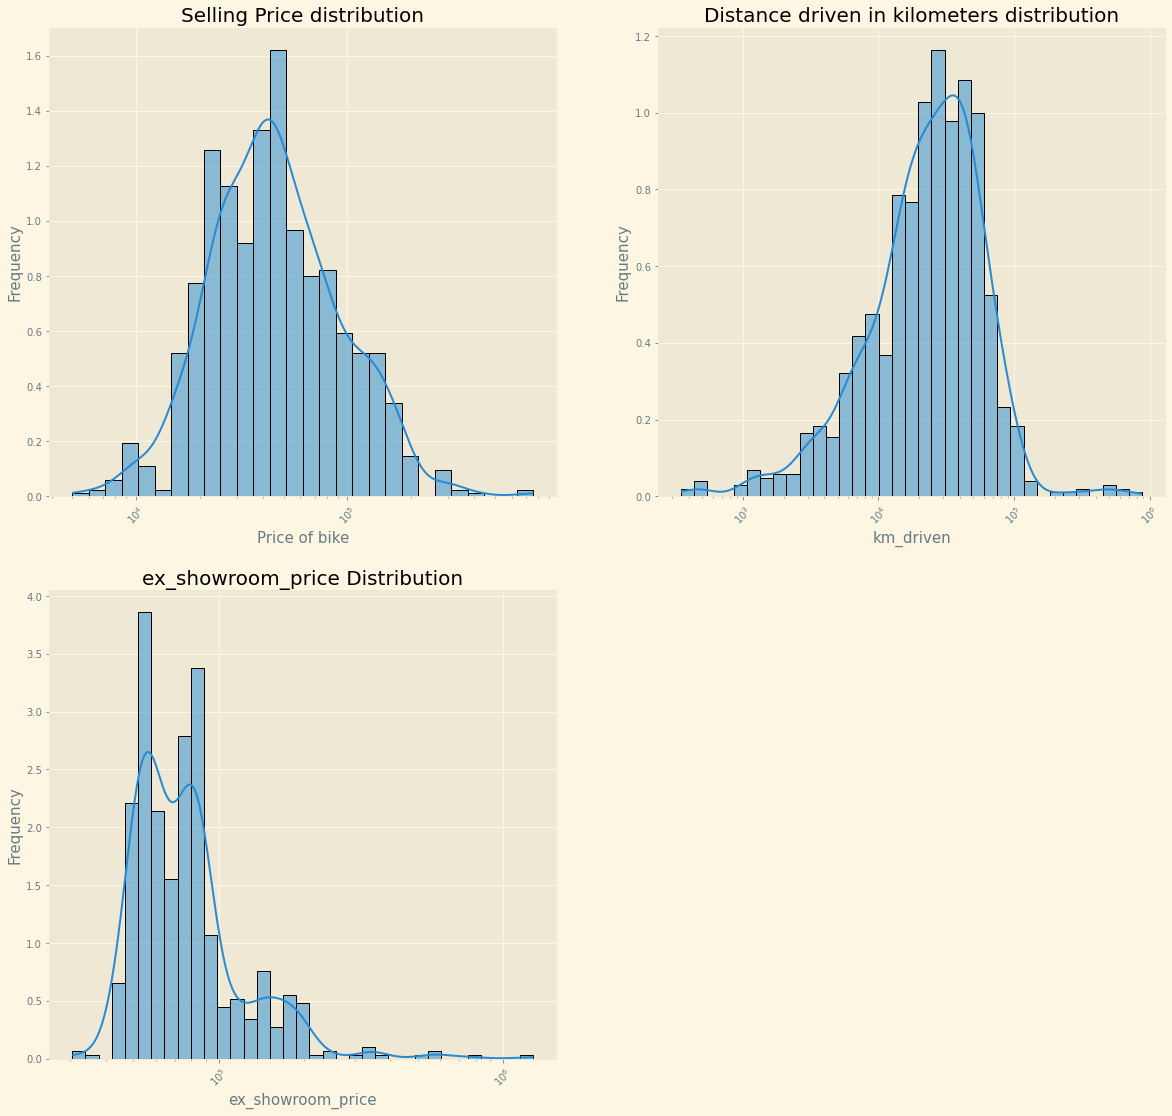

In [191]:
# data distribution across numerical variables
plt.figure(figsize=(20,50))
plt.style.use('Solarize_Light2')


plt.subplot(5,2,1)
sns.histplot(df['selling_price'], kde=True, stat='density', log_scale=True)
plt.xticks(rotation = 45)
plt.xlabel("Price of bike",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Selling Price distribution",fontsize = 20)

plt.subplot(5,2,2)
sns.histplot(df['km_driven'], kde=True, stat='density', log_scale=True)
plt.xticks(rotation = 45)
plt.xlabel("km_driven",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Distance driven in kilometers distribution",fontsize = 20)

plt.subplot(5,2,3)
sns.histplot(df['ex_showroom_price'], kde=True, stat='density', log_scale=True)
plt.xticks(rotation = 45)
plt.xlabel("ex_showroom_price",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Ex Showroom Price Distribution",fontsize = 20)


plt.show()
plt.close()

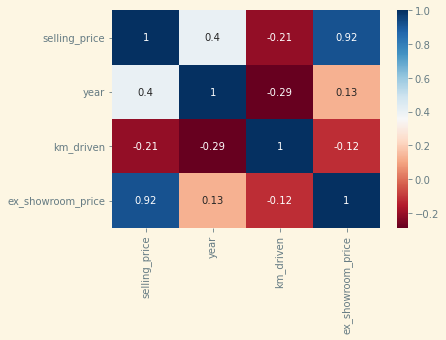

In [192]:
# correlation plot
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

We see that Selling price of the bike has the maximum positive correlation with Ex Showroom Price. 

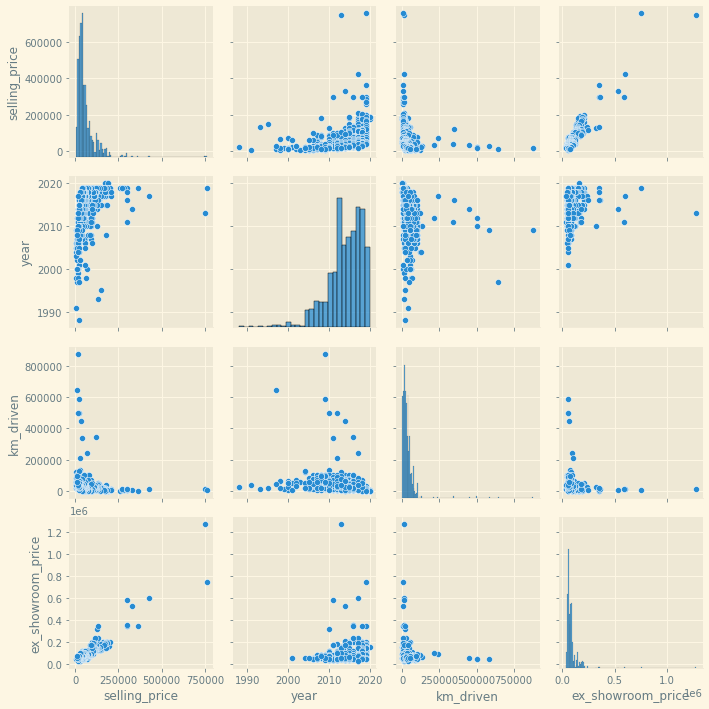

In [101]:
# scatter plots of all the combination of columns
sns.pairplot(df);

Inferences :
- Maximum cars were sold in between 2010 and 2020. 
- Kilometers driven has a slight negative correlation with selling price. In some instances, the lower the kilometers driven for a bike, we notice a higher selling price. 
- Ex showroom price and selling price have direct positive correlation. We notice that for a bike with lower ex showroom price, we notice a lower selling price too. 

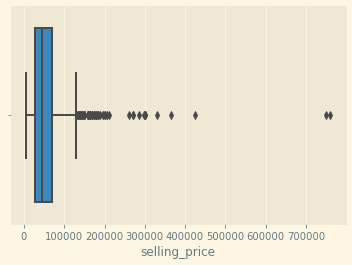

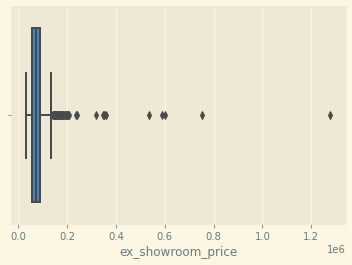

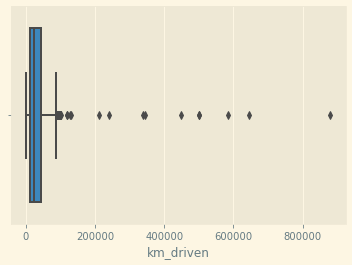

In [102]:
# boxplot of numerical columns
num_cols = ['selling_price','ex_showroom_price','km_driven']
for i in num_cols :
    sns.boxplot(x=i, data=df)
    plt.show()

In [75]:
# numeric summaries of selling_price by seller_type
df.groupby("seller_type")["selling_price"].describe()

,count,mean,std,min,25%,50%,75%,max
seller_type,,,,,,,,
Dealer,6.0,46666.666667,25734.542286,15000.0,28250.0,44000.0,66500.0,80000.0
Individual,1055.0,59711.923223,56427.961672,5000.0,28000.0,45000.0,70000.0,760000.0


In [76]:
# numeric summaries of selling_price by number of owners
df.groupby("owner")["selling_price"].describe()

,count,mean,std,min,25%,50%,75%,max
owner,,,,,,,,
1,924.0,60022.813853,51542.569711,5000.0,30000.0,45000.0,74250.0,760000.0
2,123.0,55666.658537,81671.923395,6000.0,25000.0,32000.0,57500.0,750000.0
3,11.0,55727.272727,38385.129697,20000.0,27500.0,45000.0,67500.0,150000.0
4,3.0,118333.333333,183325.757419,10000.0,12500.0,15000.0,172500.0,330000.0


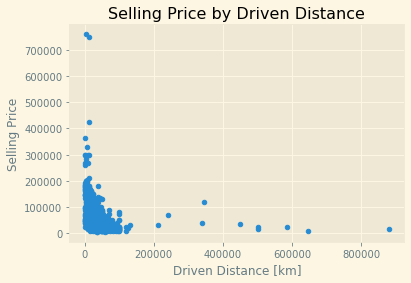

In [77]:
# graphic summery - scatter plot of selling price by driven distance
df.plot.scatter(x="km_driven", y="selling_price")
plt.xlabel("Driven Distance [km]")
plt.ylabel("Selling Price")
plt.title("Selling Price by Driven Distance")
plt.show()

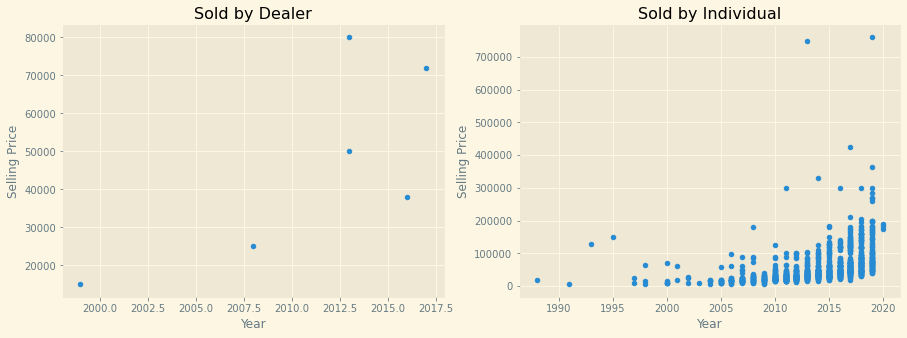

In [78]:
# graphic summery - scatter plot of selling price by seller type
df_dealer = df[df["seller_type"] == "Dealer"]
df_individual = df[df["seller_type"] == "Individual"]

# create 1x2 plots
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

# first scatter plot
plt.subplot(1, 2, 1) 
df_dealer.plot.scatter(ax=ax[0], x="year", y="selling_price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Sold by Dealer")

# second scatter plot
plt.subplot(1, 2, 2) 
df_individual.plot.scatter(ax=ax[1], x="year", y="selling_price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Sold by Individual")

plt.show()

In [80]:
# Contingency table: owner by selling prices (ranges)
df["price_range"] = pd.cut(df.selling_price, bins=[0, 10000, 100000, 1000000])
pd.crosstab(df.owner, df.price_range, margins = True) 

price_range,"(0, 10000]","(10000, 100000]","(100000, 1000000]",All
owner,,,,
1,19,775,130,924
2,4,105,14,123
3,0,10,1,11
4,1,1,1,3
All,24,891,146,1061


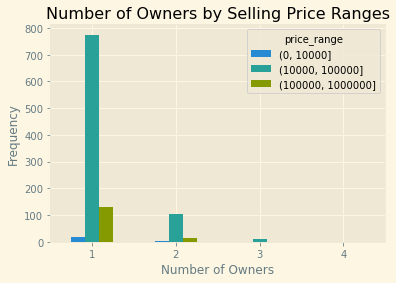

In [81]:
# stacked bar plot: owner by selling prices (ranges)
pd.crosstab(df.owner, df.price_range).plot.bar()
plt.xlabel("Number of Owners")
plt.ylabel("Frequency")
plt.title("Number of Owners by Selling Price Ranges")
plt.xticks(rotation = 0)

plt.show()

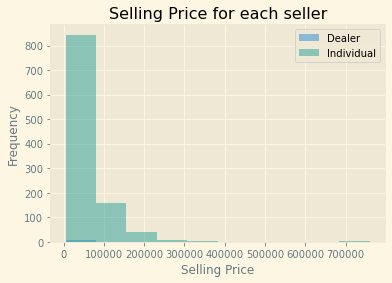

In [82]:
# Plotting Selling Price categorised by Seller Type 
dealer = df.loc[df.seller_type == "Dealer", "selling_price"]
ind = df.loc[df.seller_type == "Individual", "selling_price"]
age_hist_df = pd.DataFrame([pd.Series(dealer), pd.Series(ind)]).transpose()
age_hist_df.columns = ["Dealer", "Individual"]
age_hist_df.plot.hist(alpha = 0.5)
plt.xlabel("Selling Price")
plt.title("Selling Price for each seller")
plt.show()
plt.close()

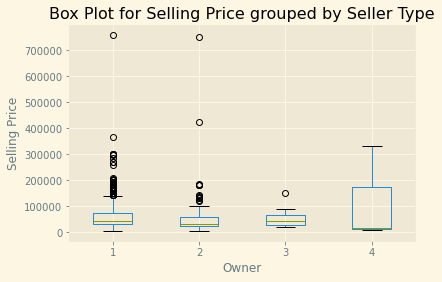

In [103]:
# Plotting Selling Price grouped by Owner
df.boxplot(column = "selling_price", by = "owner")
plt.title('Box Plot for Selling Price grouped by Seller Type')
plt.xlabel('Owner')
plt.ylabel('Selling Price')
plt.suptitle('')
plt.show()